## Machine Learning

Analyzing a store database and using machine learning to check:
- do website visitors generate online, offline or catalog sales?
- how much do people that buy meat spend in wine?

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import linear_model

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/isadoramuller/datascience/main/marketing_campaign.csv")

In [29]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,6862,1971,Graduation,Divorced,1730,0,0,5/18/2014,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0
1,5376,1979,Graduation,Married,2447,1,0,1/6/2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0
2,11110,1973,Graduation,Single,3502,1,0,4/13/2013,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
3,9931,1963,PhD,Married,4023,1,1,6/23/2014,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0
4,10311,1969,Graduation,Married,4428,0,1,10/5/2013,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0


#### Multiple linear regression

In [30]:
X = data[['NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Income', 'NumCatalogPurchases']]

Y = data["MntWines"]

In [31]:
train = data[:(int((len(data)*0.8)))]
test = data[:(int((len(data)*0.8)))]

In [32]:
regr = linear_model.LinearRegression()

train_x = np.array(train[['NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Income', 'NumCatalogPurchases']])
train_y = np.array(train["MntWines"])
regr.fit(train_x,train_y)

test_x = np.array(test[['NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Income', 'NumCatalogPurchases']])
test_y = np.array(test["MntWines"])

In [33]:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coef"])
coeff_data

,Coef
NumStorePurchases,26.096011
NumWebPurchases,13.457526
NumWebVisitsMonth,31.507754
Income,0.005323
NumCatalogPurchases,45.435481


Buying wine is more related to local stores than with online stores. However, catalogs are more related to wine purchase.

In [34]:
Y_pred = regr.predict(test_x)

In [35]:
R = r2_score(test_y , Y_pred)
print ("R^2", R)

R^2 0.7215356854266062


Accuracy is 72.1%



#### Simple linear regression

Checking:
- Meat spend vs wine spent
-  website visits vs sales in different PoS.

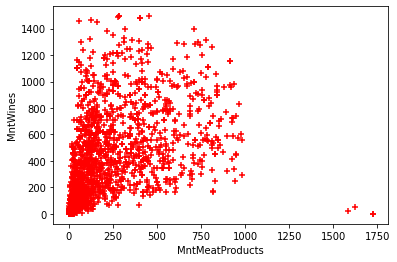

In [36]:
%matplotlib inline
plt.xlabel('MntMeatProducts')
plt.ylabel('MntWines')
plt.scatter(data.MntMeatProducts,data.MntWines, color='red',marker='+')

In [47]:
regr = linear_model.LinearRegression()

train_x = np.array(train[["MntMeatProducts"]])
train_y = np.array(train[["MntWines"]])

regr.fit(train_x, train_y)

print ("Coef ",regr.coef_)
print ("Intercept ",regr.intercept_)

Coef  [[1.08721767]]
Intercept  [117.48495945]


In [48]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [50]:
meat = 1000
compras_vs_web_visit = get_regression_predictions(meat,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated:",compras_vs_web_visit)

Estimated: 1204.7026330508845


Web visits vs. ...........

In [51]:
#...website purchases

regr = linear_model.LinearRegression()

train_x = np.array(train[["NumWebVisitsMonth"]])
train_y = np.array(train[["NumWebPurchases"]])

regr.fit(train_x, train_y)

print ("Coef ",regr.coef_)
print ("Intercept ",regr.intercept_)

Coef  [[-0.00197374]]
Intercept  [3.8131378]


In [52]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [53]:
visitas_site = 5
compras_vs_web_visit = get_regression_predictions(visitas_site,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated:",compras_vs_web_visit)

Estimated: 3.803269106027024


In [54]:
#...local stores

regr = linear_model.LinearRegression()

train_x = np.array(train[["NumWebVisitsMonth"]])
train_y = np.array(train[["NumStorePurchases"]])

regr.fit(train_x, train_y)

print ("Coef ",regr.coef_)
print ("Intercept ",regr.intercept_)

Coef  [[-0.52706656]]
Intercept  [8.34189454]


In [55]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [56]:
visitas_site = 5
compras_vs_web_visit = get_regression_predictions(visitas_site,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated:",compras_vs_web_visit)

Estimated: 5.706561746851513


In [57]:
#Catalog 
regr = linear_model.LinearRegression()

train_x1 = np.array(train[["NumWebVisitsMonth"]])
train_y1 = np.array(train[["NumCatalogPurchases"]])

regr.fit(train_x, train_y)

print ("Coef ",regr.coef_)
print ("Intercept ",regr.intercept_)

Coef  [[-0.52706656]]
Intercept  [8.34189454]


In [58]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    
    return predicted_values

In [59]:
visitas_site = 5
compras_vs_web_visit = get_regression_predictions(visitas_site,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated:",compras_vs_web_visit)

Estimated: 5.706561746851513
